# Ensemble methods: bagging, boosting and stacking

## Introduction

We will discuss some well-known notions such as bootstrapping, bagging, random forest, boosting, stacking and many others that are the basis of ensemble learning.

### What are ensemble methods?
Ensemble learning is a machine learning paradigm where multiple models (often called “weak learners”) are trained to solve the same problem and combined to get better results. The main hypothesis is that when weak models are correctly combined we can obtain more accurate and/or robust models.<br>

In machine learning, no matter if we are facing a classification or a regression problem, the choice of the model is extremely important to have any chance to obtain good results. This choice can depend on many variables of the problem: quantity of data, dimensionality of the space, distribution hypothesis.<br>

A low bias and a low variance, although they most often vary in opposite directions, are the two most fundamental features expected for a model. Indeed, to be able to “solve” a problem, we want our model to have enough degrees of freedom to resolve the underlying complexity of the data we are working with, but we also want it to have not too much degrees of freedom to avoid high variance and be more robust. This is the well known bias-variance tradeoff.<br>

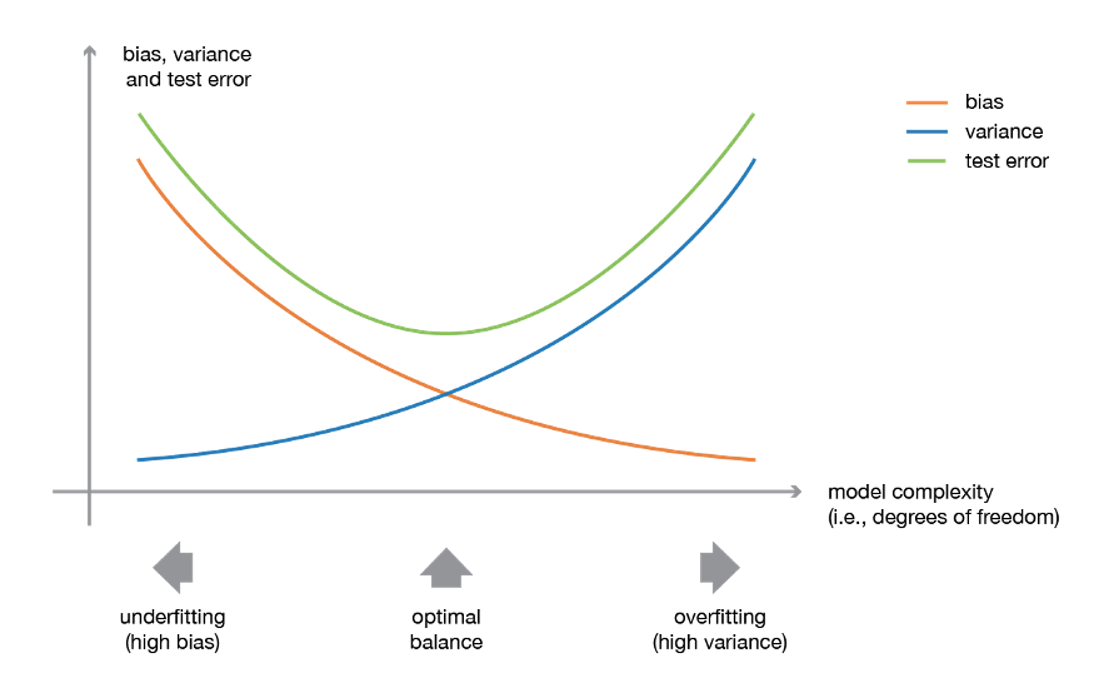
Illustration of the bias-variance tradeoff.

In ensemble learning theory, we call weak learners (or base models) models that can be used as building blocks for designing more complex models by combining several of them. Most of the time, these basics models perform not so well by themselves either because they have a high bias (low degree of freedom models, for example) or because they have too much variance to be robust (high degree of freedom models, for example). Then, the idea of ensemble methods is to try reducing bias and/or variance of such weak learners by combining several of them together in order to create a strong learner (or ensemble model) that achieves better performances.<br>

**Combine weak learners**<br>
In order to set up an ensemble learning method, we first need to select our base models to be aggregated. Most of the time (including in the well known bagging and boosting methods) a single base learning algorithm is used so that we have homogeneous weak learners that are trained in different ways. The ensemble model we obtain is then said to be “homogeneous”. However, there also exist some methods that use different type of base learning algorithms: some heterogeneous weak learners are then combined into an “heterogeneous ensembles model”.


One important point is that our choice of weak learners should be coherent with the way we combine these models(weak learners).
This brings us to the question of how to combine these models. We can mention three major kinds of meta-algorithms that aims at combining weak learners:<br>

- **bagging**, that often considers homogeneous weak learners, learns them independently from each other in parallel and combines them following some kind of deterministic averaging process.<br>

- **boosting**, that often considers homogeneous weak learners, learns them sequentially in a very adaptative way (a base model depends on the previous ones) and combines them following a deterministic strategy<br>

- **stacking**, that often considers heterogeneous weak learners, learns them in parallel and combines them by training a meta-model to output a prediction based on the different weak models predictions<br>

Very roughly, we can say that bagging will mainly focus at getting an ensemble model with less variance than its components whereas boosting and stacking will mainly try to produce strong models less biased than their components (even if variance can also be reduced).
In the following sections, we will present in details bagging and boosting (that are a bit more widely used than stacking and will allow us to discuss some key notions of ensemble learning) before giving a brief overview of stacking.

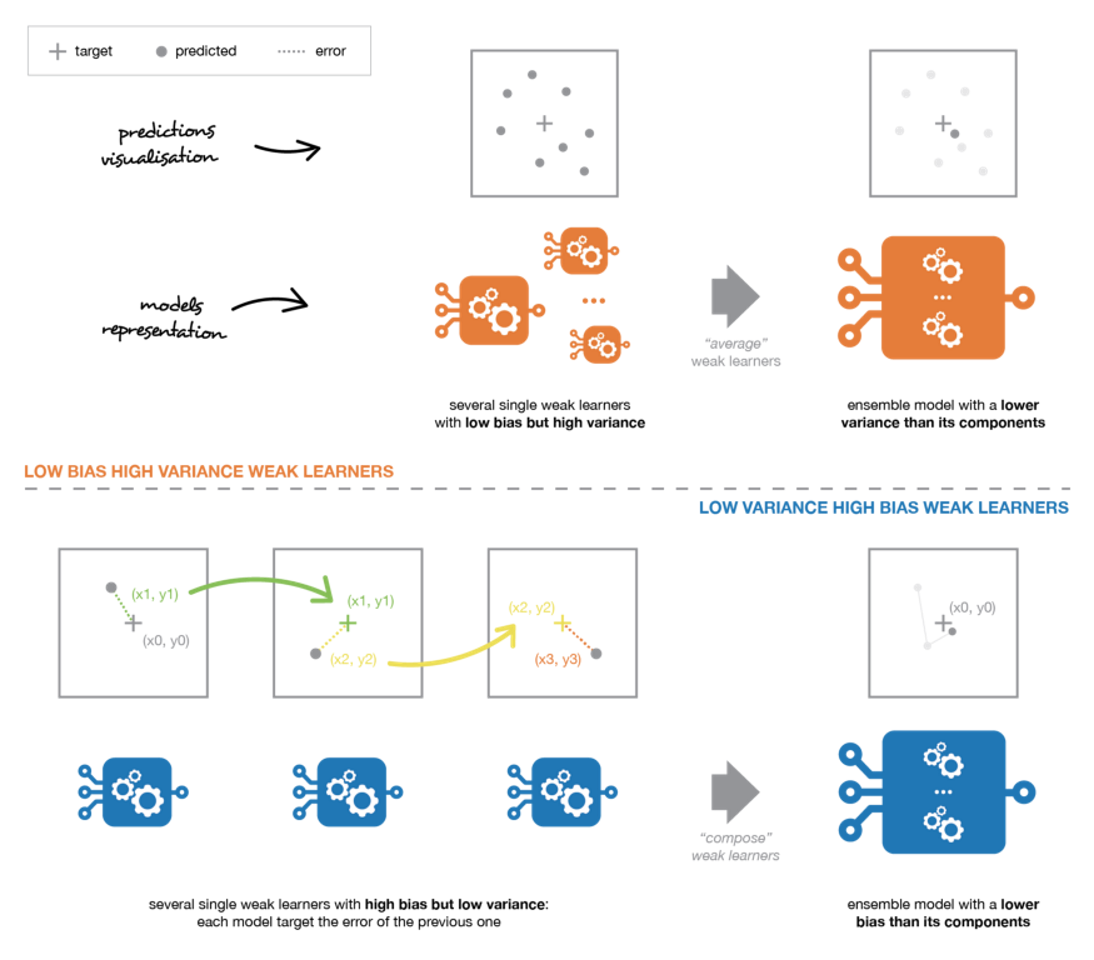

Weak learners can be combined to get a model with better performances. The way to combine base models should be adapted to their types. Low bias and high variance weak models should be combined in a way that makes the strong model more robust whereas low variance and high bias base models better be combined in a way that makes the ensemble model less biased.

## Focus on bagging

In parallel methods we fit the different considered learners independently from each others and, so, it is possible to train them concurrently. The most famous such approach is “bagging” (standing for “bootstrap aggregating”) that aims at producing an ensemble model that is more robust than the individual models composing it.

## Bootstrapping
Let’s begin by defining bootstrapping. This statistical technique consists in generating samples of size B (called bootstrap samples) from an initial dataset of size N by randomly drawing with replacement B observations.

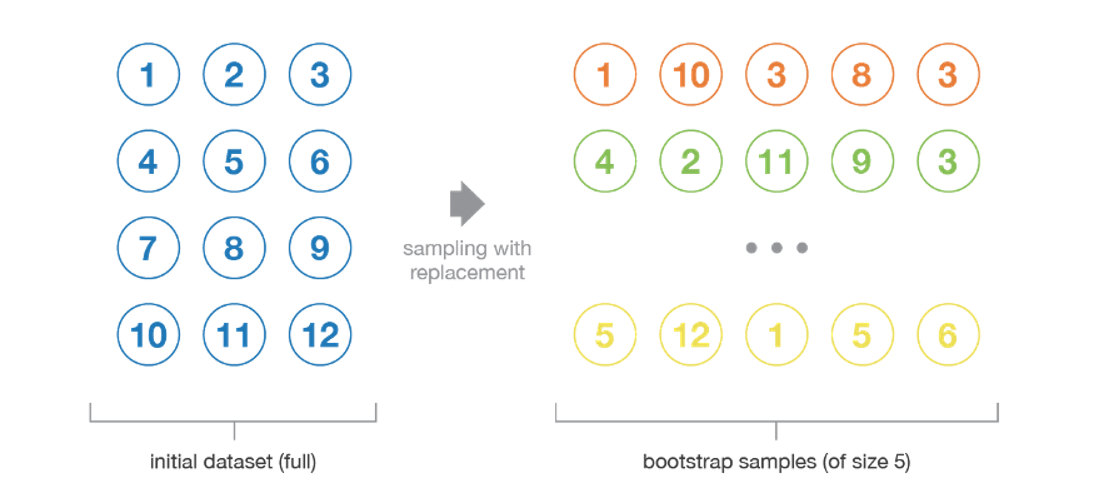
Illustration of the bootstrapping process.

Under some assumptions, these samples have pretty good statistical properties: in first approximation, they can be seen as being drawn both directly from the true underlying (and often unknown) data distribution and independently from each others. So, they can be considered as representative and independent samples of the true data distribution (almost i.i.d. samples). The hypothesis that have to be verified to make this approximation valid are twofold. First, the size N of the initial dataset should be large enough to capture most of the complexity of the underlying distribution so that sampling from the dataset is a good approximation of sampling from the real distribution (representativity). Second, the size N of the dataset should be large enough compared to the size B of the bootstrap samples so that samples are not too much correlated (independence). Notice that in the following, we will sometimes make reference to these properties (representativity and independence) of bootstrap samples: the reader should always keep in mind that this is only an approximation.<br>

Bootstrap samples are often used, for example, to evaluate variance or confidence intervals of a statistical estimators. By definition, a statistical estimator is a function of some observations and, so, a random variable with variance coming from these observations. In order to estimate the variance of such an estimator, we need to evaluate it on several independent samples drawn from the distribution of interest. In most of the cases, considering truly independent samples would require too much data compared to the amount really available. We can then use bootstrapping to generate several bootstrap samples that can be considered as being “almost-representative” and “almost-independent” (almost i.i.d. samples). These bootstrap samples will allow us to approximate the variance of the estimator, by evaluating its value for each of them.<br>

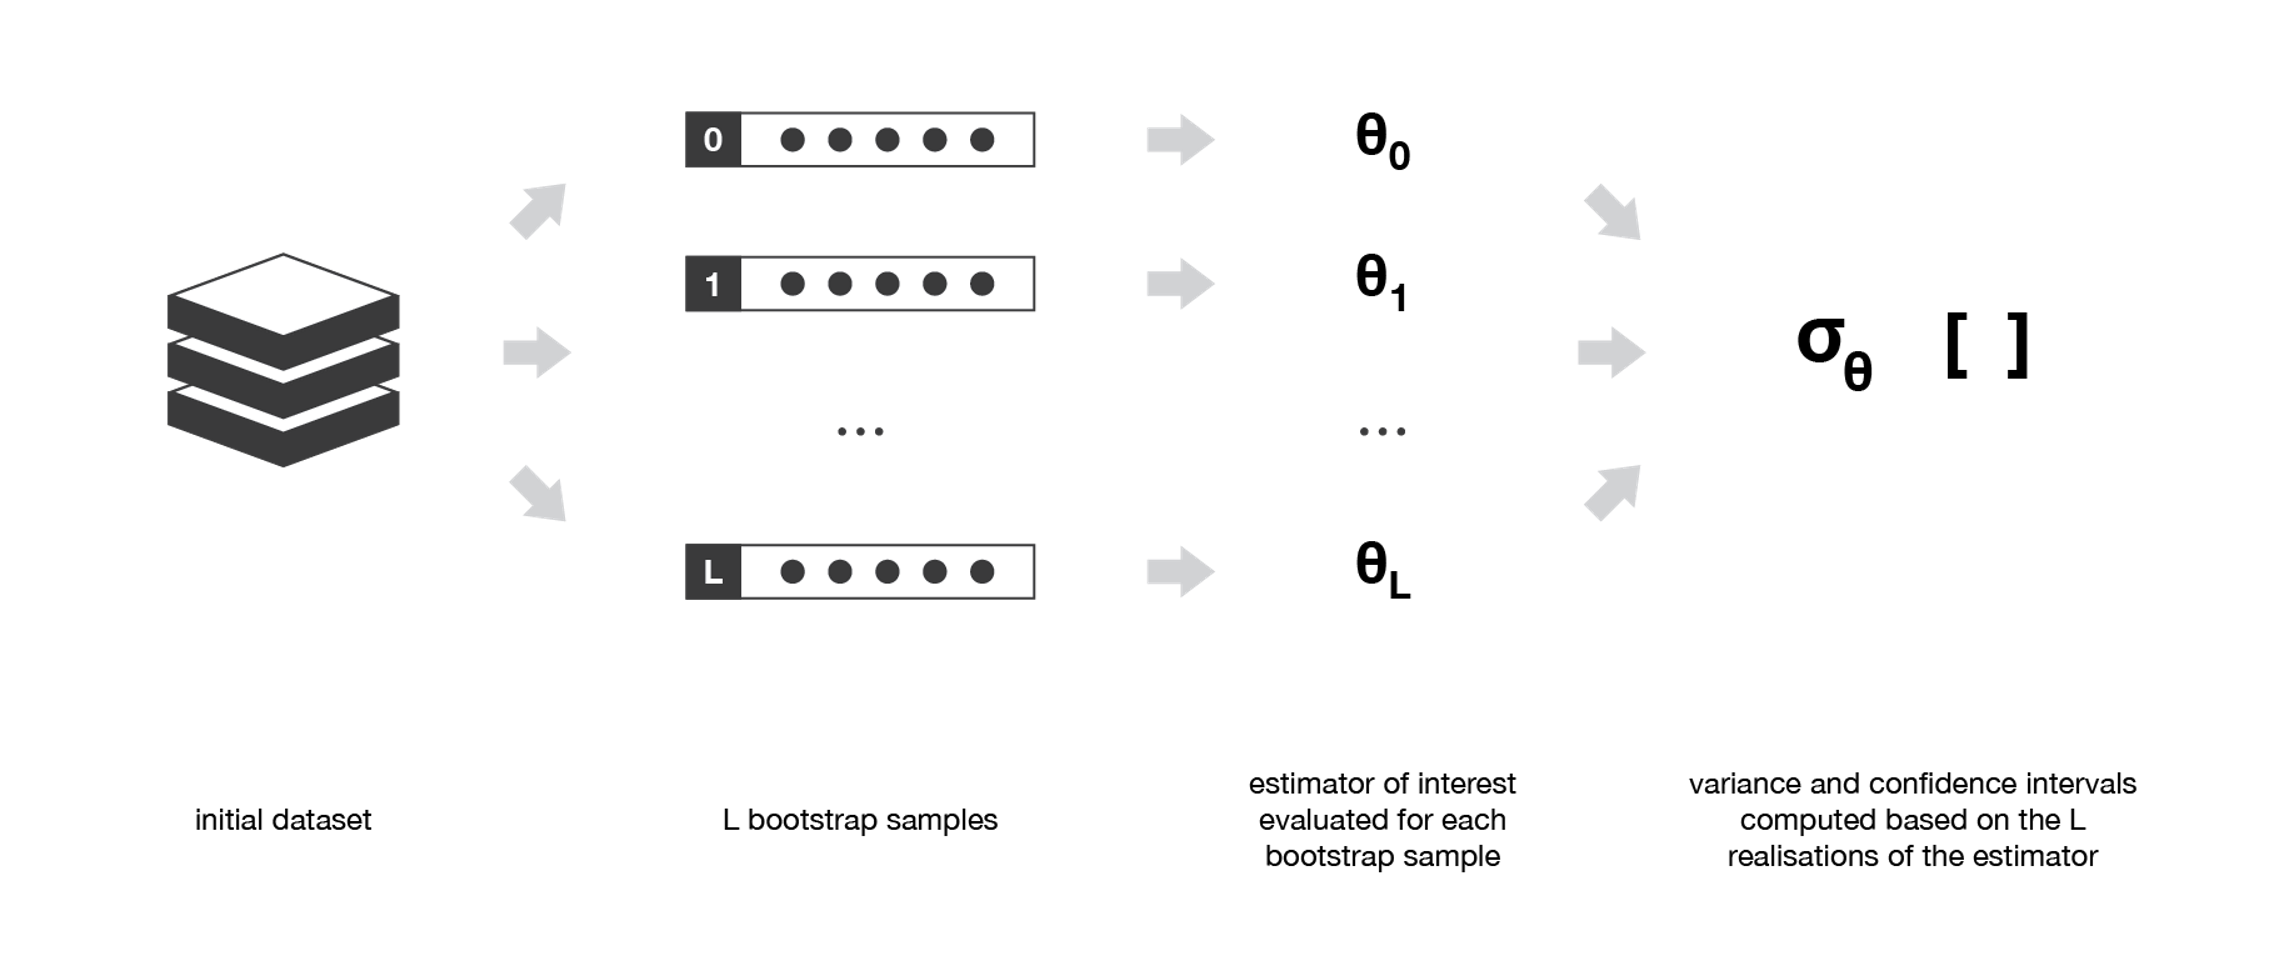


Bootstrapping is often used to evaluate variance or confidence interval of some statistical estimators.

## Bagging

When training a model, no matter if we are dealing with a classification or a regression problem, we obtain a function that takes an input, returns an output and that is defined with respect to the training dataset. The idea of bagging is then simple: we want to fit several independent models and “average” their predictions in order to obtain a model with a lower variance. However, we can’t, in practice, fit fully independent models because it would require too much data. So, we rely on the good “approximate properties” of bootstrap samples (representativity and independence) to fit models that are almost independent.<br>

First, we create multiple bootstrap samples so that each new bootstrap sample will act as another (almost) independent dataset drawn from true distribution. Then, we can fit a weak learner for each of these samples and finally aggregate them such that we kind of “average” their outputs and, so, obtain an ensemble model with less variance than its weak learner.<br>

So, assuming that we have L bootstrap samples (approximations of L independent datasets) of size B denoted

$$ \{z_{1}^{1}, z_{2}^{1},...., z_{B}^{1}\}, \{z_{1}^{2}, z_{2}^{2},...., z_{B}^{2}\}, .... , \{z_{1}^{L}, z_{2}^{L},...., z_{B}^{L}\} $$

$ z_{b}^{l} = b^{th}$ observation of $l^{th}$ bootstrap sample
We can fit almost L independent weak learners (one on each dataset)

$$ w_{1}(.), w_{2}(.),....,w_{L}(.) $$
and then aggregate them into some kind of averaging process in order to get an ensemble model with a lower variance. For example, we can define our strong model such that

$$ s_L(.) = {1 \over L} \sum_{l=1}^{L} w_l(.)  \quad \quad\quad\quad\quad \text{(simple average for regression problem)}$$
$$ s_L(.) = \underset{k}{\argmax}[card(l|w_l(.) = k)] \quad\quad \quad\quad  \text{(simple majority vote, for classification problem)}$$

There are several possible ways to aggregate the multiple models fitted in parallel. For a regression problem, the outputs of individual models can literally be averaged to obtain the output of the ensemble model. For classification problem the class outputted by each model can be seen as a vote and the class that receives the majority of the votes is returned by the ensemble model (this is called hard-voting). Still for a classification problem, we can also consider the probabilities of each classes returned by all the models, average these probabilities and keep the class with the highest average probability (this is called soft-voting). Averages or votes can either be simple or weighted if any relevant weights can be used.<br>

Finally, we can mention that one of the big advantages of bagging is that it can be parallelised. As the different models are fitted independently from each others, intensive parallelisation techniques can be used if required.

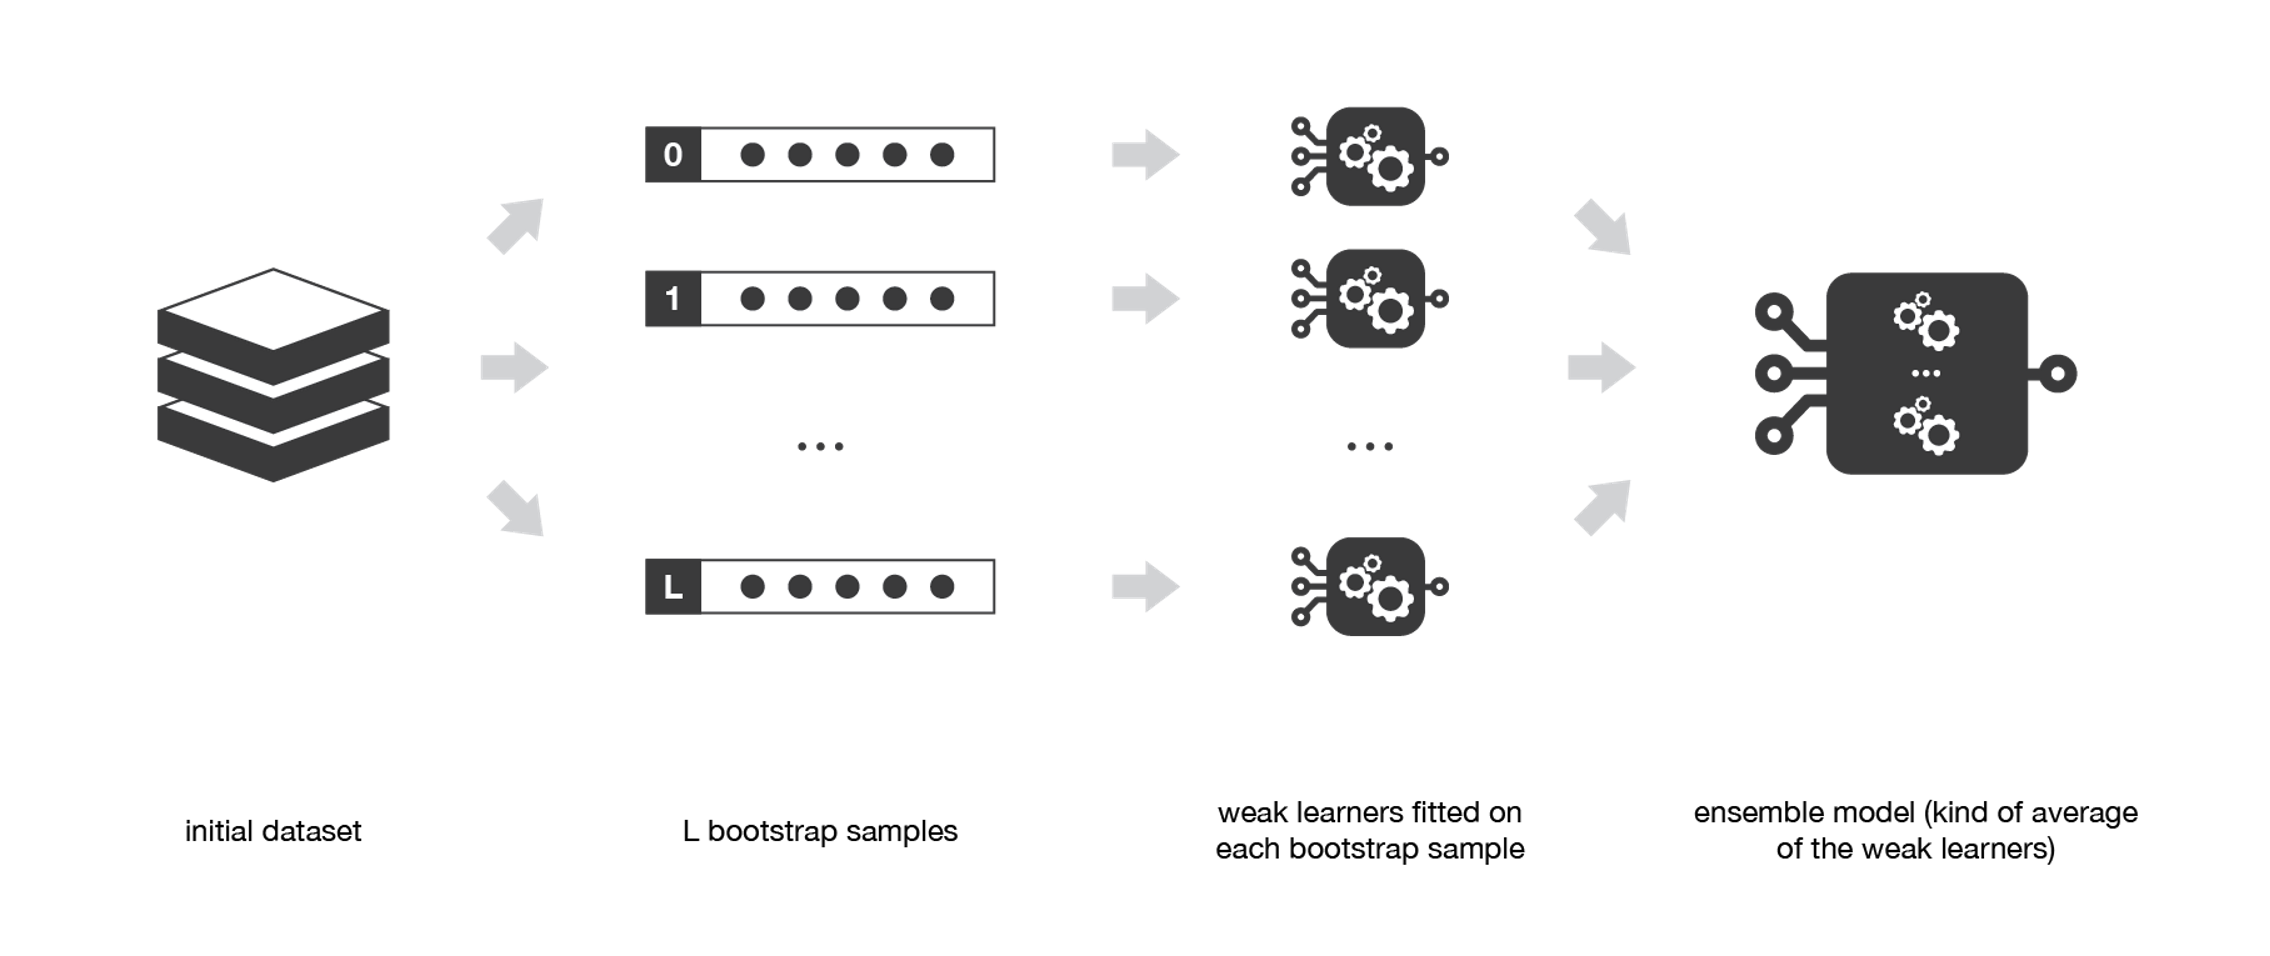

Bagging consists in fitting several base models on different bootstrap samples and build an ensemble model that “average” the results of these weak learners.


## Random forests

Learning trees are very popular base models for ensemble methods. Strong learners composed of multiple trees can be called “forests”. Trees that compose a forest can be chosen to be either shallow (few depths) or deep (lot of depths, if not fully grown). Shallow trees have less variance but higher bias and then will be better choice for sequential methods that we will described thereafter. Deep trees, on the other side, have low bias but high variance and, so, are relevant choices for bagging method that is mainly focused at reducing variance.
The random forest approach is a bagging method where deep trees, fitted on bootstrap samples, are combined to produce an output with lower variance. However, random forests also use another trick to make the multiple fitted trees a bit less correlated with each other's: when growing each tree, instead of only sampling over the observations in the dataset to generate a bootstrap sample, we also sample over features and keep only a random subset of them to build the tree.<br>

Sampling over features has indeed the effect that all trees do not look at the exact same information to make their decisions and, so, it reduces the correlation between the different returned outputs. Another advantage of sampling over the features is that it makes the decision making process more robust to missing data: observations (from the training dataset or not) with missing data can still be regressed or classified based on the trees that take into account only features where data are not missing. Thus, random forest algorithm combines the concepts of bagging and random feature subspace selection to create more robust models.

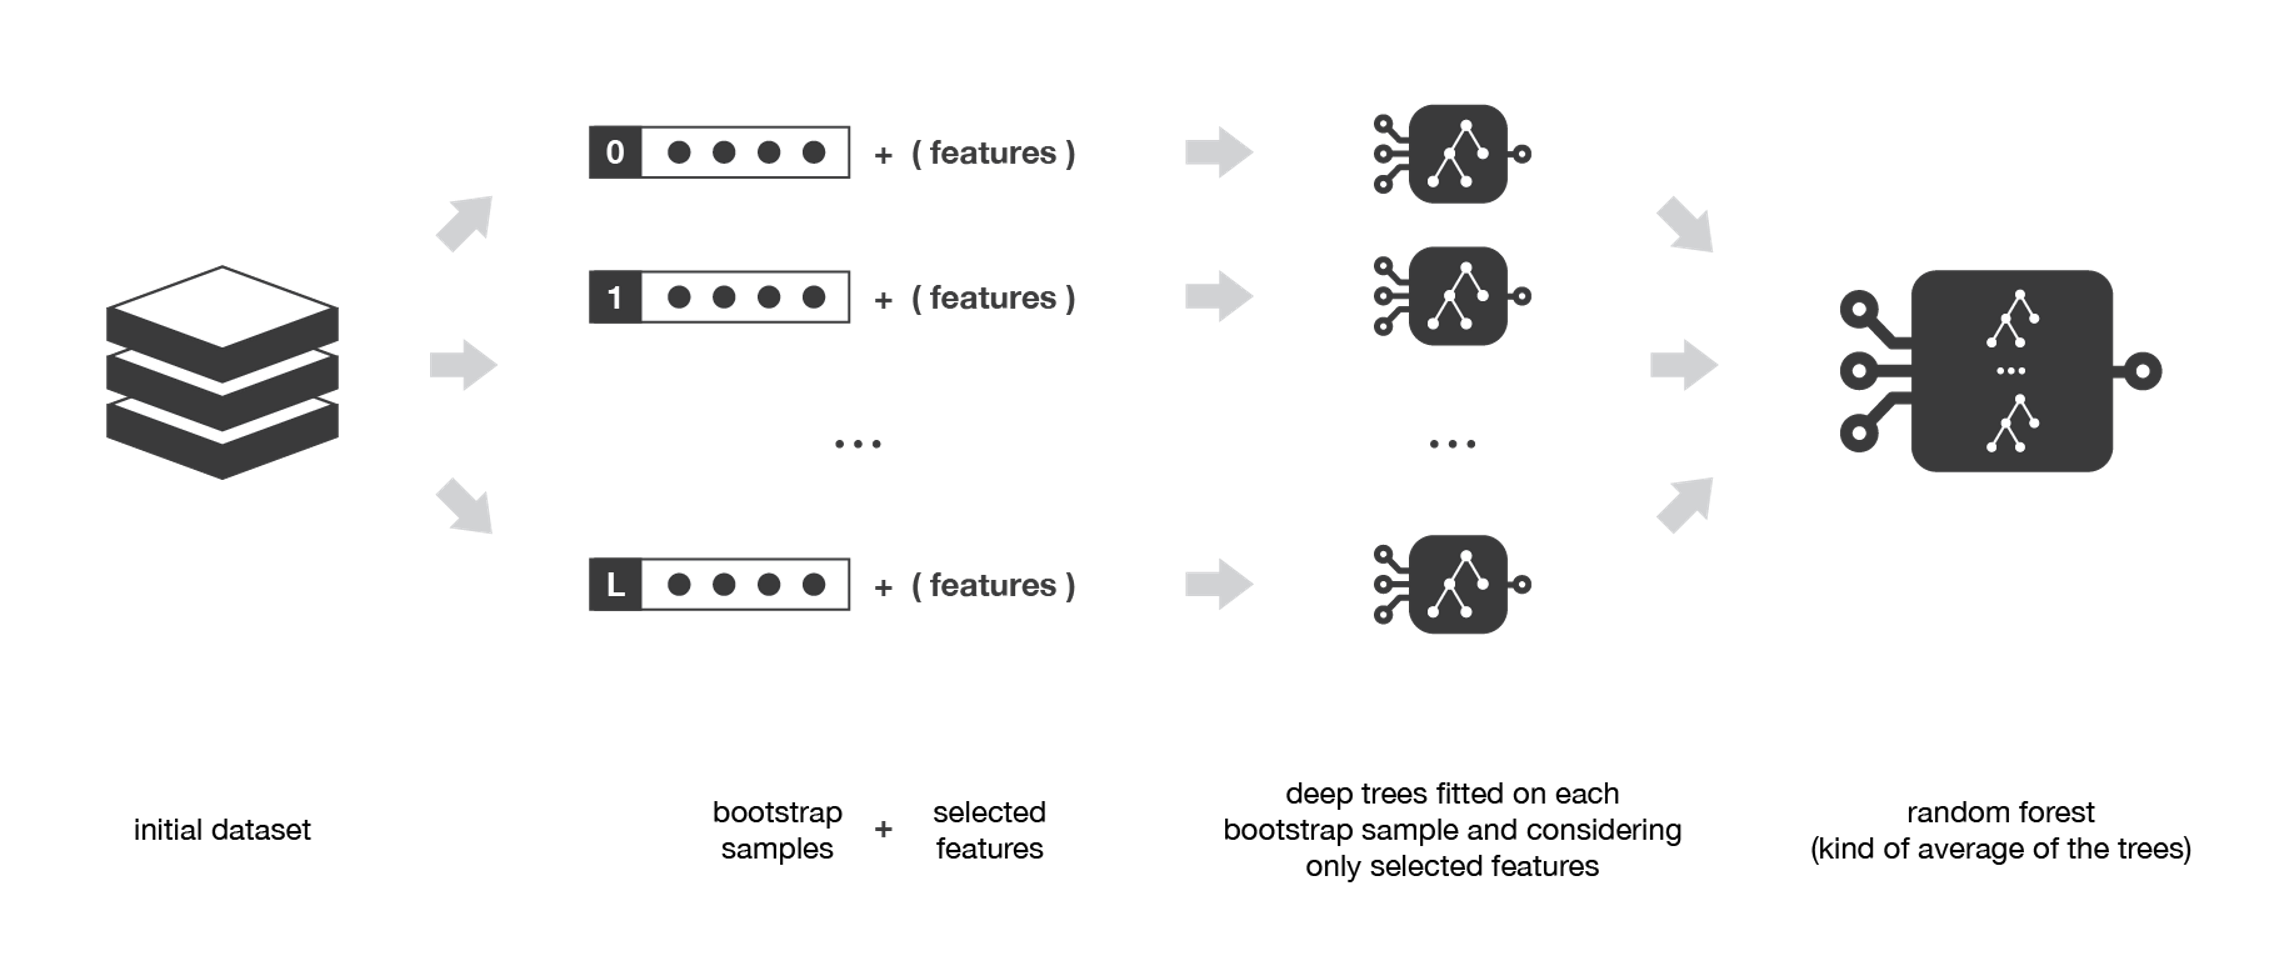
Random forest method is a bagging method with trees as weak learners. Each tree is fitted on a bootstrap sample considering only a subset of variables randomly chosen.

## Focus on boosting

In sequential methods, the idea is to fit models iteratively such that the training of model at a given step depends on the models fitted at the previous steps. “Boosting” is the most famous of these approaches and it produces an ensemble model that is in general less biased than the weak learners that compose it.

### Boosting

Boosting methods work in the same spirit as bagging methods: we build a family of models that are aggregated to obtain a strong learner that performs better. However, unlike bagging that mainly aims at reducing variance, boosting is a technique that consists in fitting sequentially multiple weak learners in a very adaptative way: each model in the sequence is fitted giving more importance to observations in the dataset that were badly handled by the previous models in the sequence. Intuitively, each new model focus its efforts on the most difficult observations to fit up to now, so that we obtain, at the end of the process, a strong learner with lower bias (even if we can notice that boosting can also have the effect of reducing variance). Boosting, like bagging, can be used for regression as well as for classification problems.<br>

Being mainly focused at reducing bias, the base models that are often considered for boosting are models with low variance but high bias. For example, if we want to use trees as our base models, we will choose most of the time shallow decision trees with only a few depths. Another important reason that motivates the use of low variance but high bias models as weak learners for boosting is that these models are in general less computationally expensive to fit (few degrees of freedom when parametrised). Indeed, as computations to fit the different models can’t be done in parallel (unlike bagging), it could become too expensive to fit sequentially several complex models.
Once the weak learners have been chosen, we still need to define how they will be sequentially fitted (what information from previous models do we take into account when fitting current model?) and how they will be aggregated (how do we aggregate the current model to the previous ones?). We will discuss these questions in the two following subsections, describing more especially two important boosting algorithms: adaboost and gradient boosting.<br>

In a nutshell, these two meta-algorithms differ on how they create and aggregate the weak learners during the sequential process. Adaptive boosting updates the weights attached to each of the training dataset observations whereas gradient boosting updates the value of these observations. This main difference comes from the way both methods try to solve the optimisation problem of finding the best model that can be written as a weighted sum of weak learners.<br>

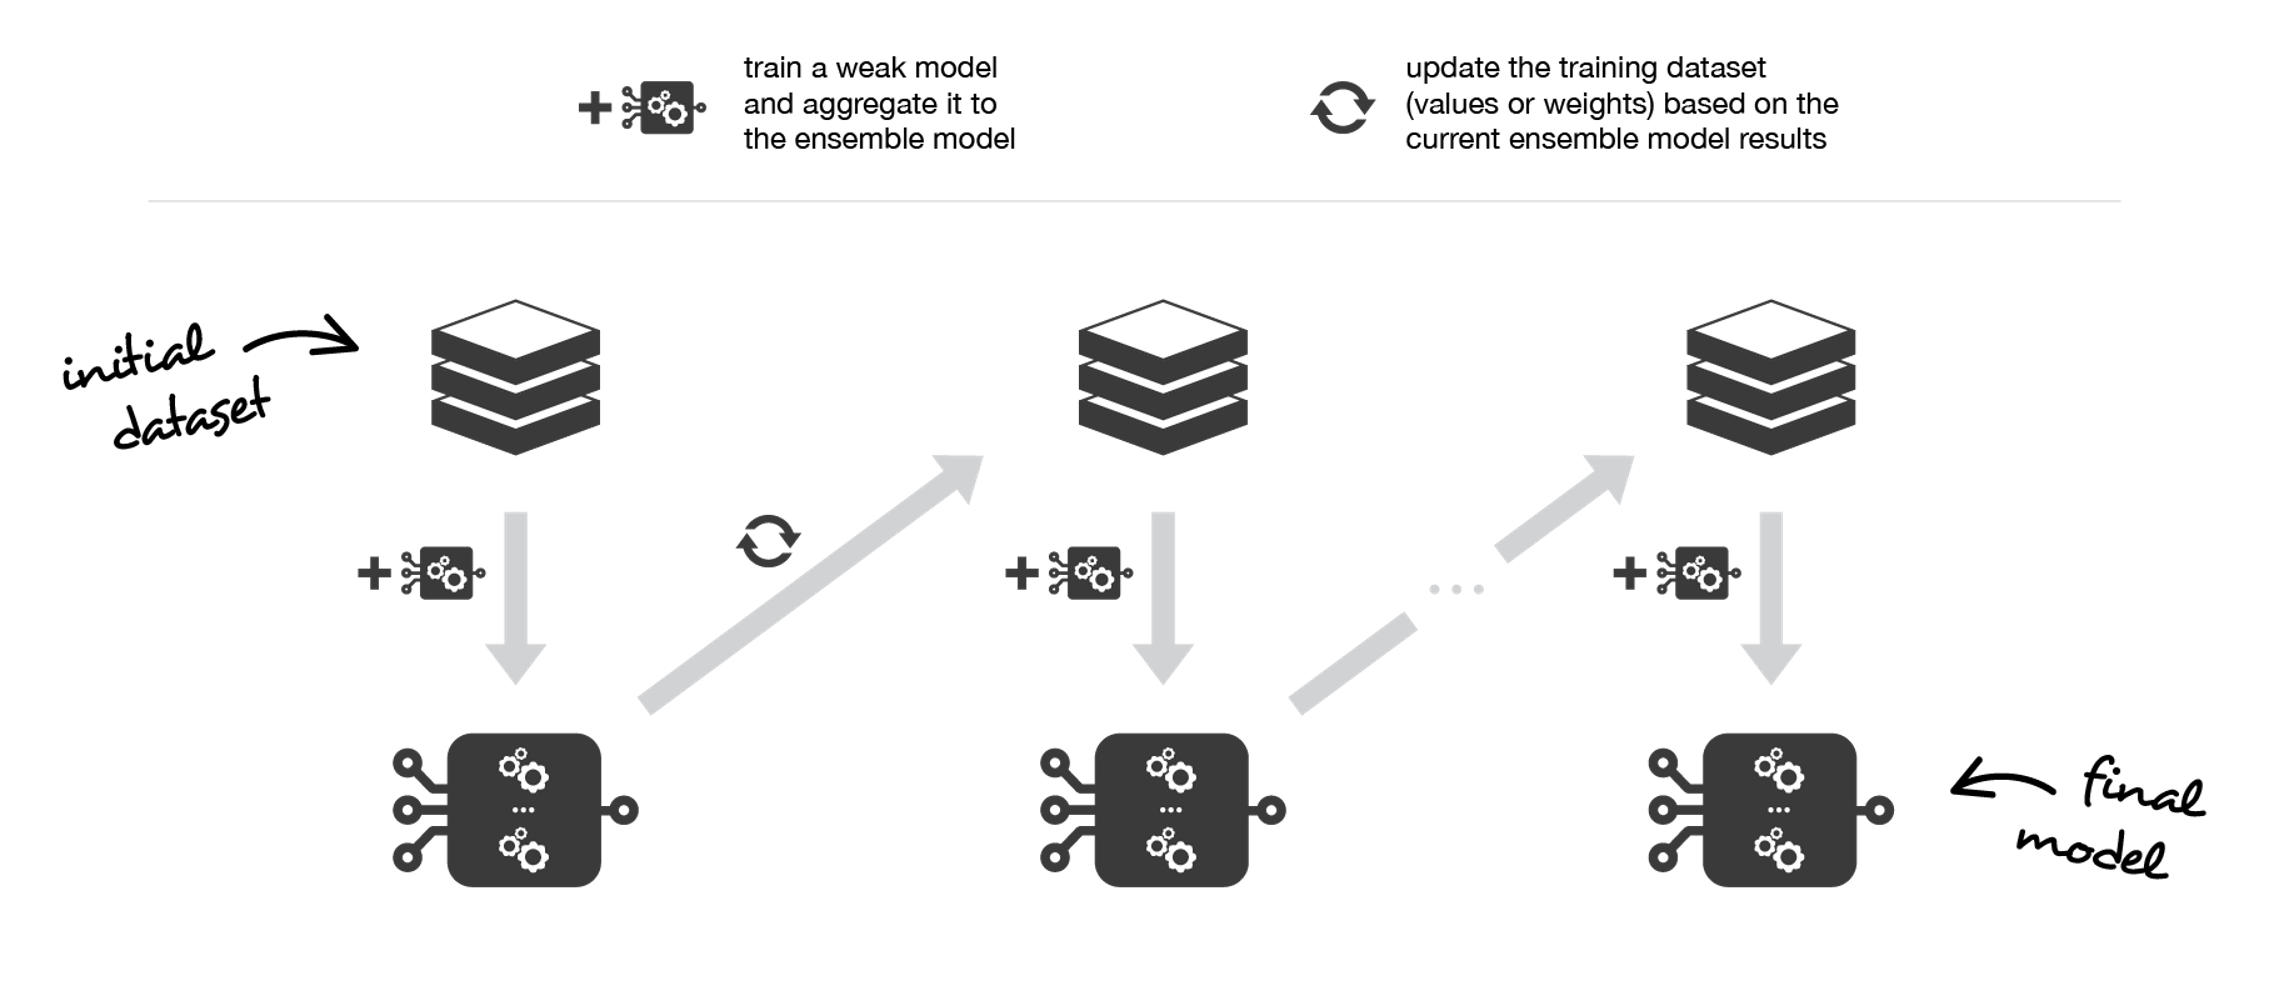
Boosting consists in, iteratively, fitting a weak learner, aggregate it to the ensemble model and “update” the training dataset to better take into account the strengths and weakness of the current ensemble model when fitting the next base model.

### Adaptative boosting

In adaptative boosting (often called “adaboost”), we try to define our ensemble model as a weighted sum of L weak learners

$$ s_L(.) = \sum_{l=1}^{L} c_l \times w_l(.)  \quad \quad\quad\quad\quad \text{(where $c_l$'s are coefficient and $w_l$'s are weak learners)}$$

Finding the best ensemble model with this form is a difficult optimisation problem. Then, instead of trying to solve it in one single shot (finding all the coefficients and weak learners that give the best overall additive model), we make use of an iterative optimisation process that is much more tractable, even if it can lead to a sub-optimal solution. More especially, we add the weak learners one by one, looking at each iteration for the best possible pair (coefficient, weak learner) to add to the current ensemble model. In other words, we define recurrently the $s_l$’s such that

$$ s_l(.) = s_{l-1}(.) + c_l \times w_l(.) $$

where $c_l$ and $w_l$ are chosen such that $s_l$ is the model that fit the best the training data and, so, that is the best possible improvement over $s_{l-1}$.

We can then denote
$$ (c_l,w_l(.)) = \underset{c,w(.)}{\argmin} E(s_{l-1}(.) + c \times w(.)) = \underset{c,w(.)}{\argmin} \sum_{n=1}^{N} e(y_n, s_{l-1}(x_n) + c \times w(x_n))   $$

where E(.) is fitting error of the given model and e(.,.) is the loss/error function. Thus, instead of optimising “globally” over all the L models in the sum, we approximate the optimum by optimising “locally” building and adding the weak learners to the strong model one by one.<br>

More especially, when considering a binary classification, we can show that the adaboost algorithm can be re-written into a process that proceeds as follow. First, it updates the observations weights in the dataset and train a new weak learner with a special focus given to the observations misclassified by the current ensemble model. Second, it adds the weak learner to the weighted sum according to an update coefficient that expresse the performances of this weak model: the better a weak learner performs, the more it contributes to the strong learner.<br>

So, assume that we are facing a binary classification problem, with N observations in our dataset and we want to use adaboost algorithm with a given family of weak models. At the very beginning of the algorithm (first model of the sequence), all the observations have the same weights 1/N. Then, we repeat L times (for the L learners in the sequence) the following steps:
- fit the best possible weak model with the current observations weights
- compute the value of the update coefficient that is some kind of scalar evaluation metric of the weak learner that indicates how much this weak learner should be taken into account into the ensemble model
- update the strong learner by adding the new weak learner multiplied by its update coefficient
- compute new observations weights that expresse which observations we would like to focus on at the next iteration (weights of observations wrongly predicted by the aggregated model increase and weights of the correctly predicted observations decrease)

Repeating these steps, we have then build sequentially our L models and aggregate them into a simple linear combination weighted by coefficients expressing the performance of each learner. Notice that there exists variants of the initial adaboost algorithm such that LogitBoost (classification) or L2Boost (regression) that mainly differ by their choice of loss function.<br>

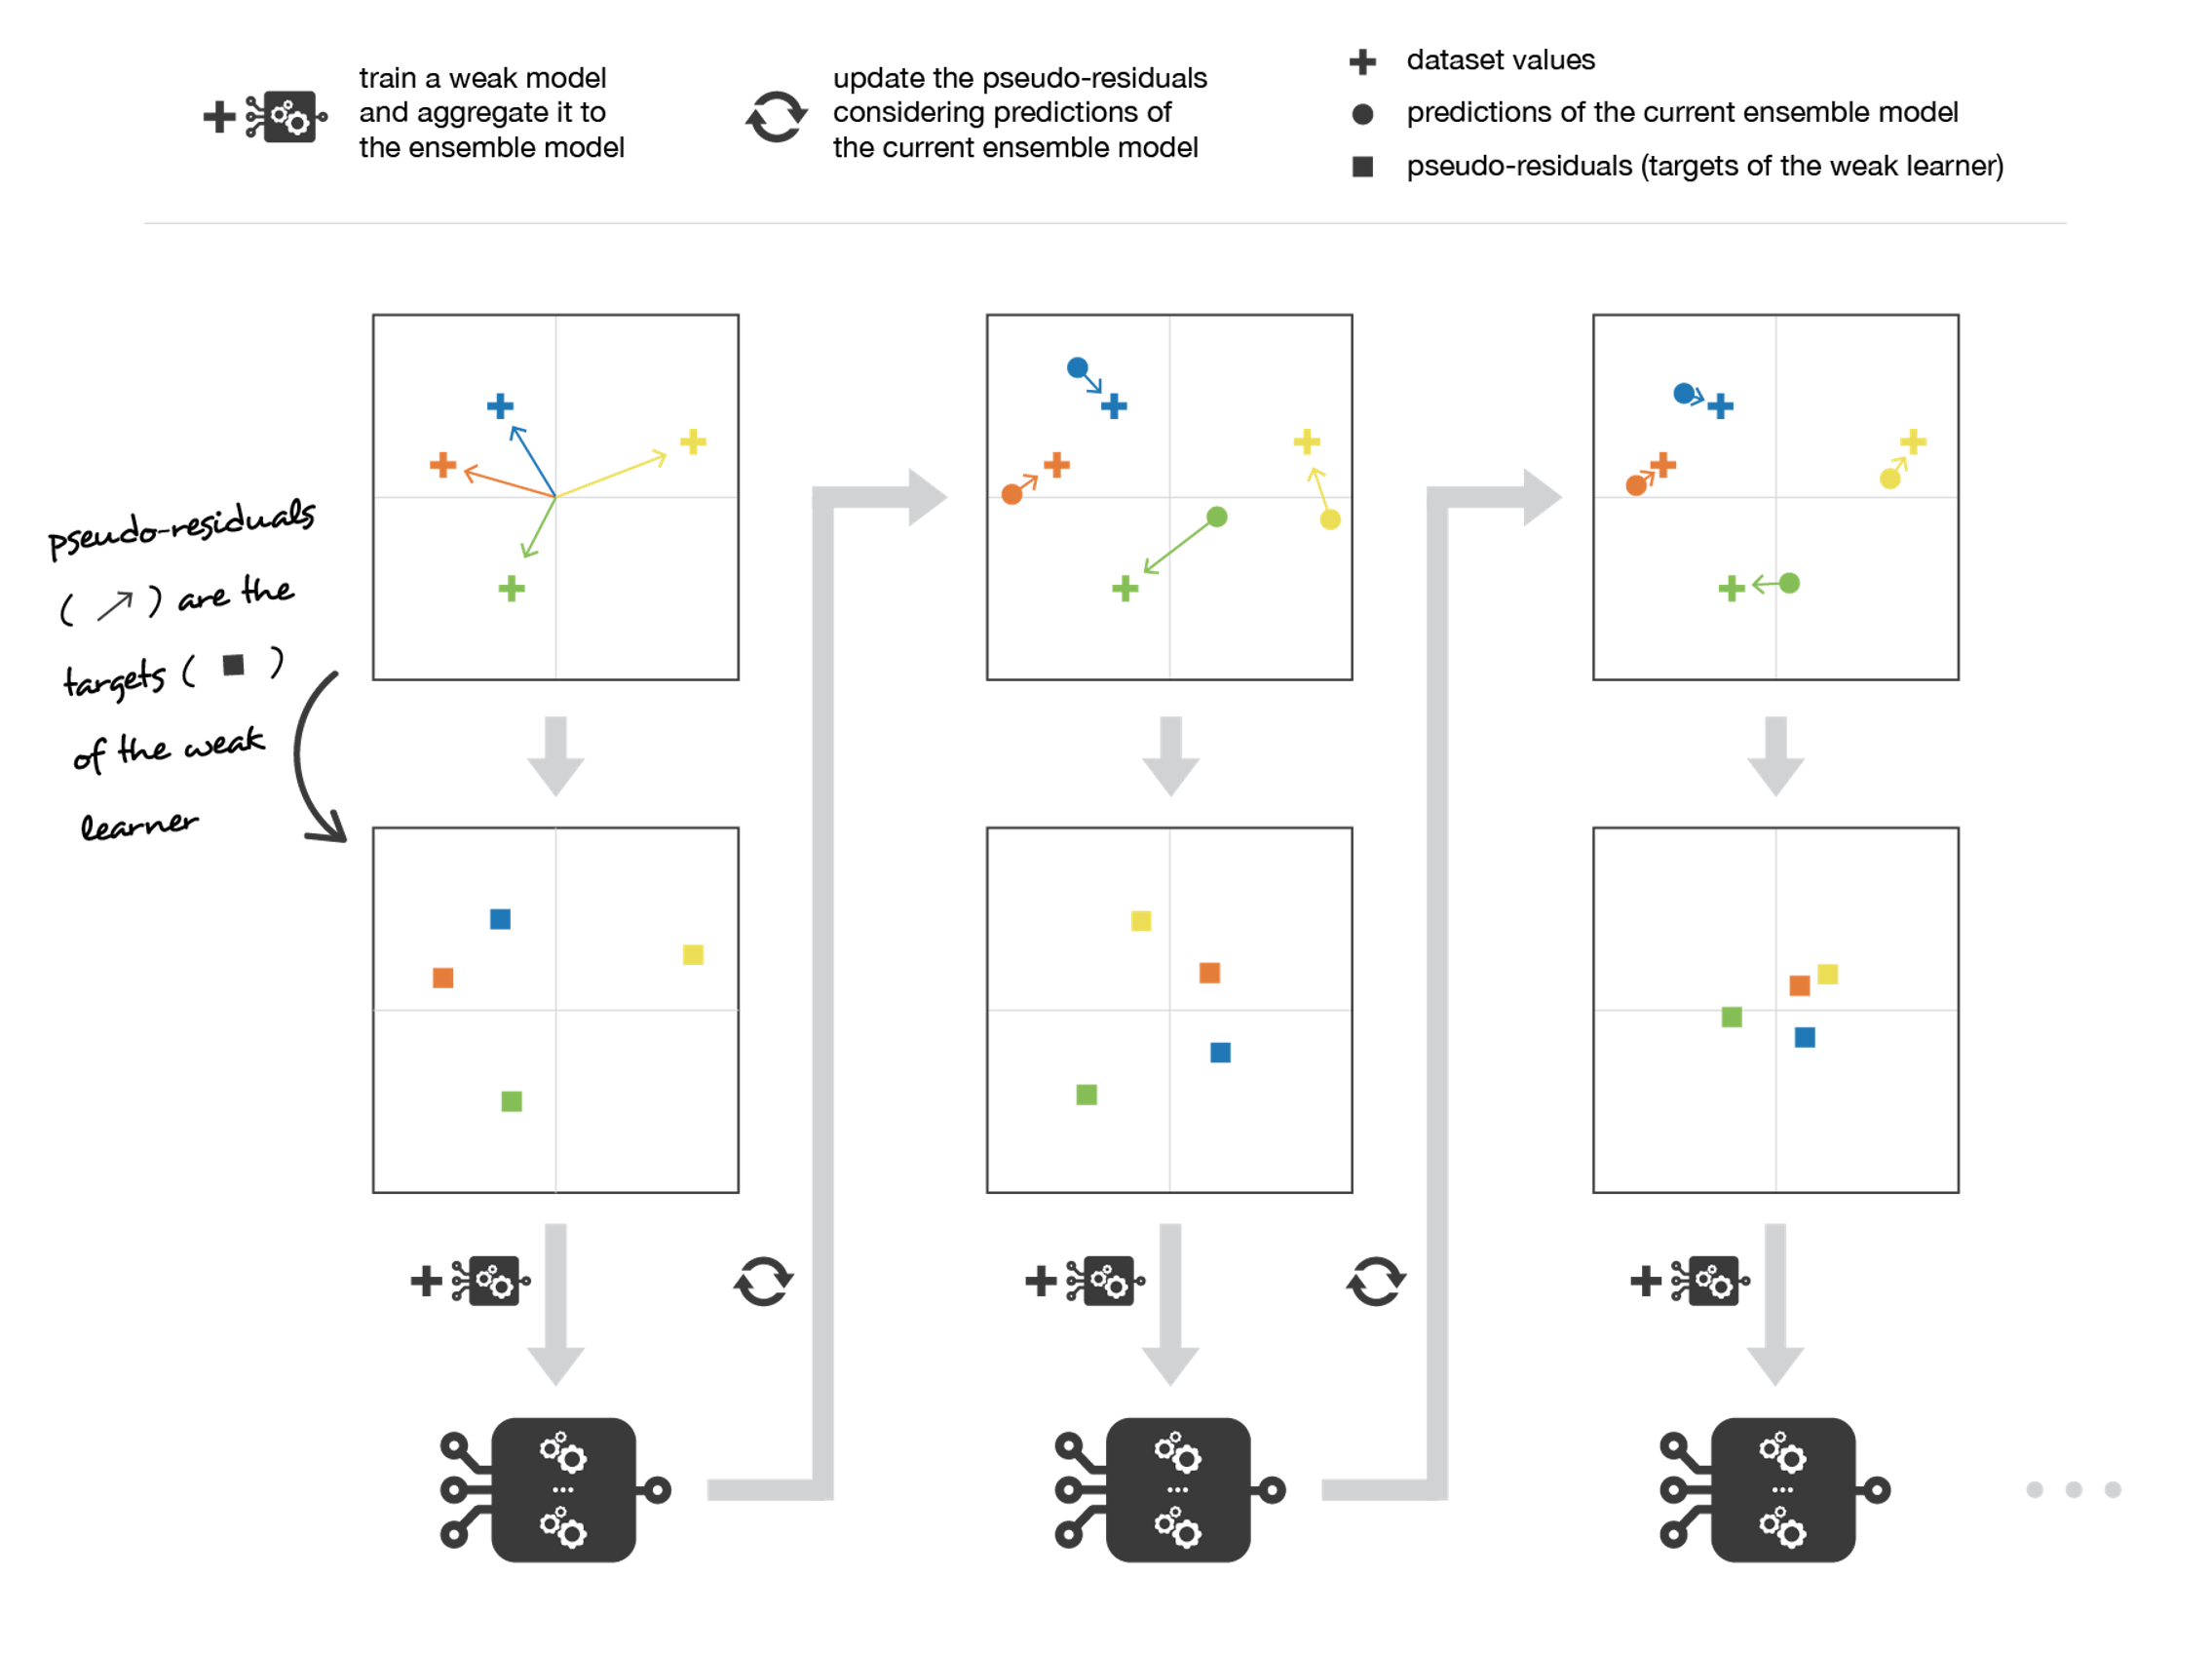
Gradient boosting updates values of the observations at each iteration. Weak learners are trained to fit the pseudo-residuals that indicate in which direction to correct the current ensemble model predictions to lower the error.

## Overview of stacking

Stacking mainly differ from bagging and boosting on two points. First stacking often considers heterogeneous weak learners (different learning algorithms are combined) whereas bagging and boosting consider mainly homogeneous weak learners. Second, stacking learns to combine the base models using a meta-model whereas bagging and boosting combine weak learners following deterministic algorithms.<br>

As we already mentioned, the idea of stacking is to learn several different weak learners and combine them by training a meta-model to output predictions based on the multiple predictions returned by these weak models. So, we need to define two things in order to build our stacking model: the L learners we want to fit and the meta-model that combines them.<br>

For example, for a classification problem, we can choose as weak learners a KNN classifier, a logistic regression and a SVM, and decide to learn a neural network as meta-model. Then, the neural network will take as inputs the outputs of our three weak learners and will learn to return final predictions based on it.<br>
     
So, assume that we want to fit a stacking ensemble composed of L weak learners. Then we have to follow the steps thereafter:
- split the training data in two folds
- choose L weak learners and fit them to data of the first fold
- for each of the L weak learners, make predictions for observations in the second fold
- fit the meta-model on the second fold, using predictions made by the weak learners as inputs

In the previous steps, we split the dataset in two folds because predictions on data that have been used for the training of the weak learners are not relevant for the training of the meta-model. Thus, an obvious drawback of this split of our dataset in two parts is that we only have half of the data to train the base models and half of the data to train the meta-model. In order to overcome this limitation, we can however follow some kind of “k-fold cross-training” approach (similar to what is done in k-fold cross-validation) such that all the observations can be used to train the meta-model: for any observation, the prediction of the weak learners are done with instances of these weak learners trained on the k-1 folds that do not contain the considered observation. In other words, it consists in training on k-1 fold in order to make predictions on the remaining fold and that iteratively so that to obtain predictions for observations in any folds. Doing so, we can produce relevant predictions for each observation of our dataset and then train our meta-model on all these predictions.

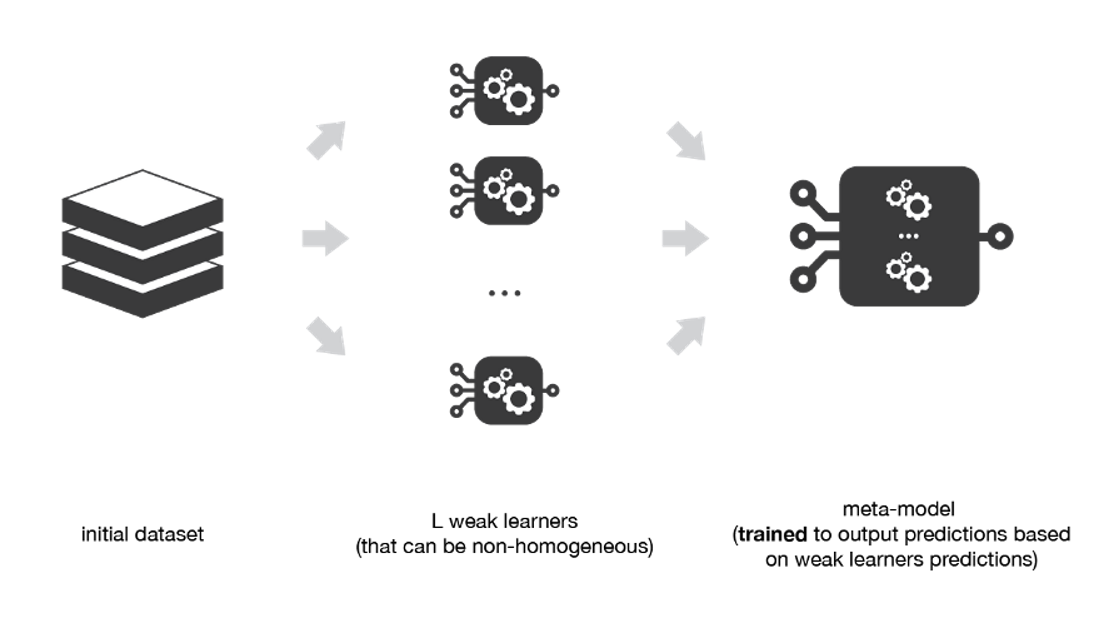
						
Stacking consists in training a meta-model to produce outputs based on the outputs returned by some lower layer weak learners

### Multi-levels Stacking
A possible extension of stacking is multi-level stacking. It consists in doing stacking with multiple layers. As an example, let’s consider a 3-levels stacking. In the first level (layer), we fit the L weak learners that have been chosen. Then, in the second level, instead of fitting a single meta-model on the weak models predictions (as it was described in the previous subsection) we fit M such meta-models. Finally, in the third level we fit a last meta-model that takes as inputs the predictions returned by the M meta-models of the previous level.<br>

From a practical point of view, notice that for each meta-model of the different levels of a multi-levels stacking ensemble model, we have to choose a learning algorithm that can be almost whatever we want (even algorithms already used at lower levels). We can also mention that adding levels can either be data expensive (if k-folds like technique is not used and, then, more data are needed) or time expensive (if k-folds like technique is used and, then, lot of models need to be fitted).<br>

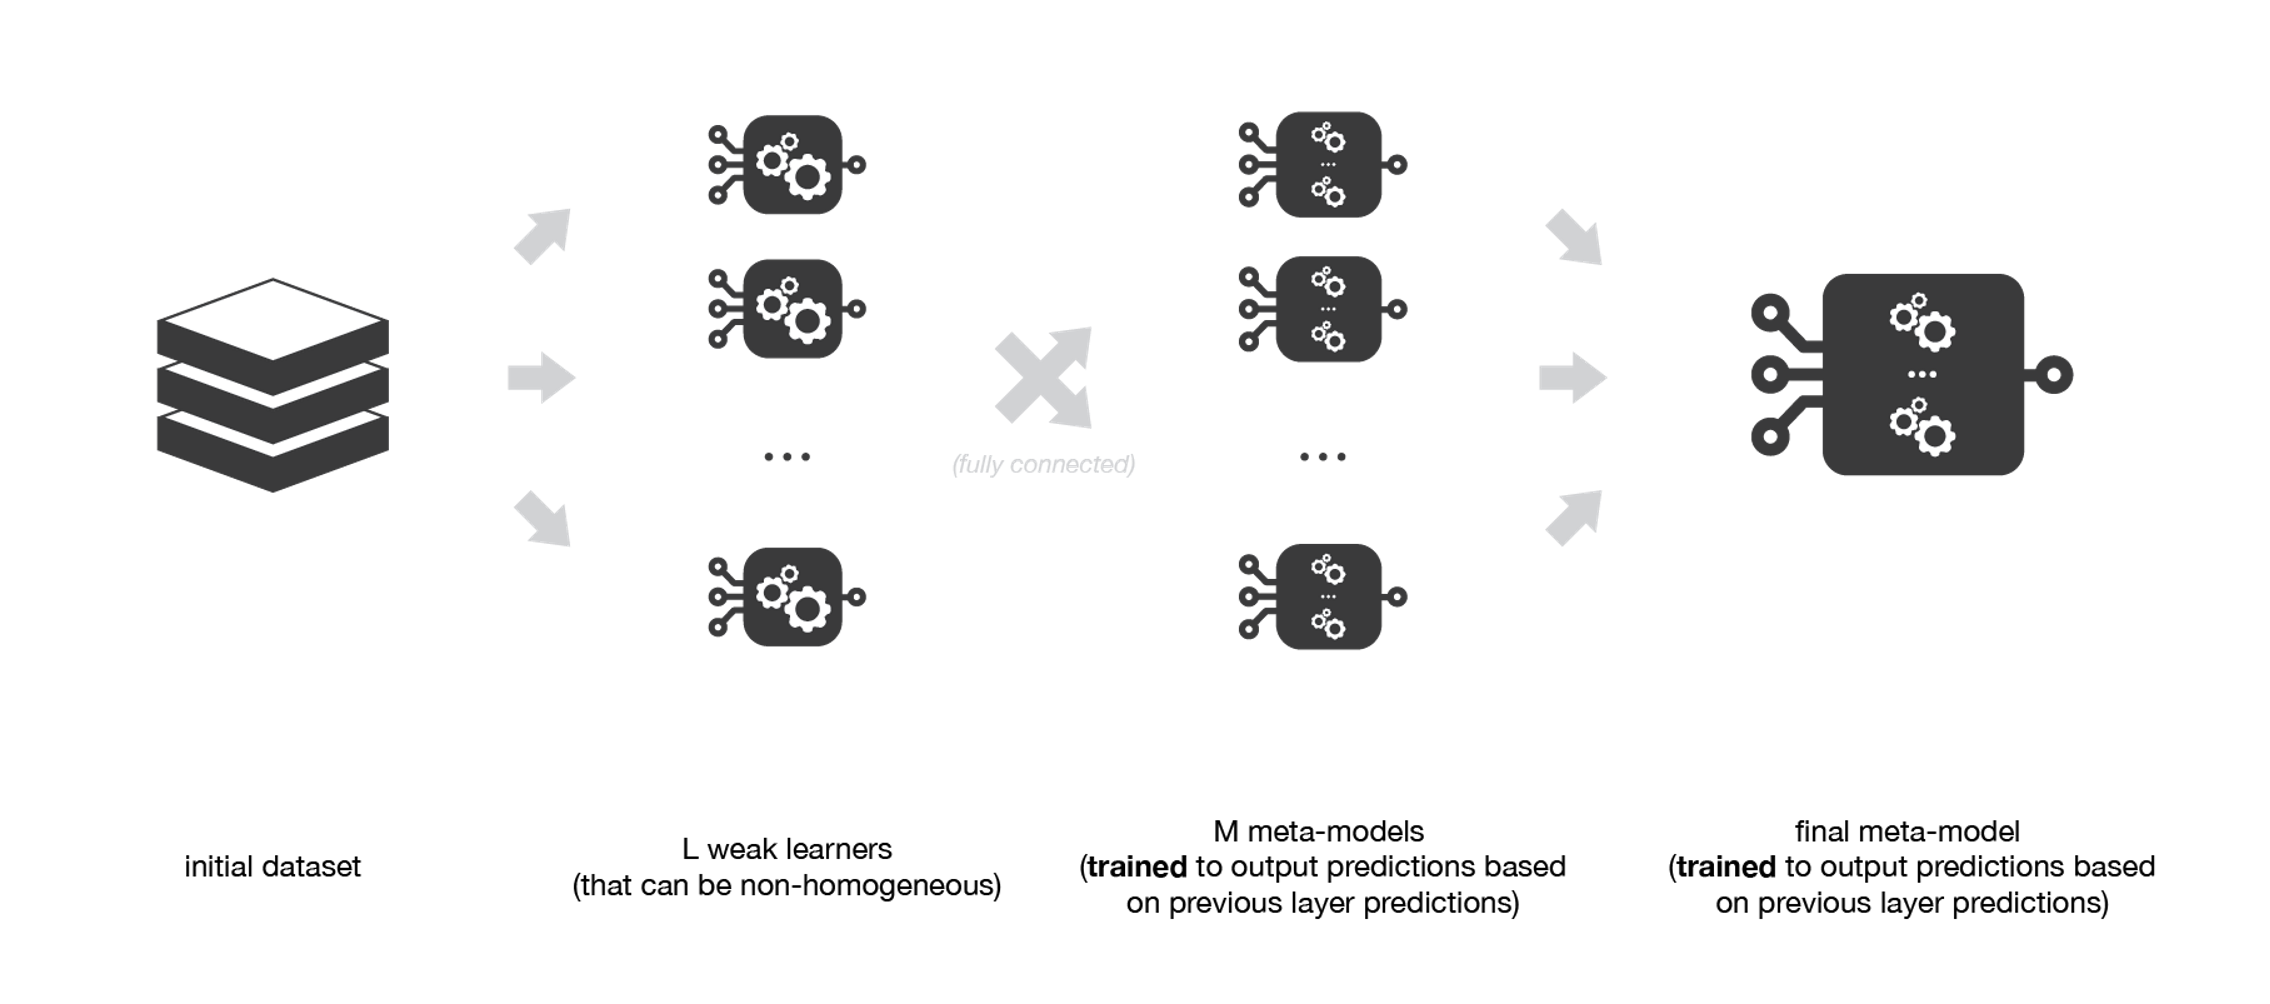

Multi-level stacking considers several layers of stacking: some meta-models are trained on outputs returned by lower layer meta-models and so on. Here we have represented a 3-layers stacking model.

## Takeaways
The main takeaways of this post are the following:
- ensemble learning is a machine learning paradigm where multiple models (often called weak learners or base models) are trained to solve the same problem and combined to get better performances
- the main hypothesis is that if we combine the weak learners the right way we can obtain more accurate and/or robust models
- in bagging methods, several instance of the same base model are trained in parallel (independently from each others) on different bootstrap samples and then aggregated in some kind of “averaging” process
- the kind of averaging operation done over the (almost) i.i.d fitted models in bagging methods mainly allows us to obtain an ensemble model with a lower variance than its components: that is why base models with low bias but high variance are well adapted for bagging
- in boosting methods, several instance of the same base model are trained sequentially such that, at each iteration, the way to train the current weak learner depends on the previous weak learners and more especially on how they are performing on the data
- this iterative strategy of learning used in boosting methods, that adapts to the weaknesses of the previous models to train the current one, mainly allows us to get an ensemble model with a lower bias than its components: that is why weak learners with low variance but high bias are well adapted for boosting
- in stacking methods, different weak learners are fitted independently from each others and a meta-model is trained on top of that to predict outputs based on the outputs returned by the base models

In this post we have given a basic overview of ensemble learning and, more especially, of some of the main notions of this field: bootstrapping, bagging, random forest, boosting (adaboost, gradient boosting) and stacking. Among the notions that were left aside we can mention for example the Out-Of-Bag evaluation technique for bagging or also the very popular “XGBoost” (that stands for eXtrem Gradient Boosting) that is a library that implements Gradient Boosting methods along with a great number of additional tricks that make learning much more efficient (and tractable for big dataset).<br>

Finally, we would like to conclude by reminding that ensemble learning is about combining some base models in order to obtain an ensemble model with better performances/properties. Thus, even if bagging, boosting and stacking are the most commonly used ensemble methods, variants are possible and can be designed to better adapt to some specific problems. This mainly requires two things: fully understand the problem we are facing… and be creative!